In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import gym
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

ENV = 'CartPole-v0'
NUM_DIGITIZED = 6
GAMMA = 0.99  #時間割引率
ETA = 0.5  #学習係数
MAX_STEPS = 200
NUM_EPISODES = 1000


def display_frames_as_gif(frames):
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    anim.save('movie_cartpole.mp4')
    display(display_animation(anim, default_mode='loop'))


In [3]:
class Agent:
    def __init__(self, num_states, num_actions):
        self.brain = Brain(num_states, num_actions)
    
    def update_Q_function(self, observation, action, reward, observation_next):
        self.brain.update_Q_table(observation, action, reward, observation_next)
        
    def get_action(self, observation, step):
        action = self.brain.decide_action(observation, step)
        return action

In [4]:
class Brain:
    def __init__(self, num_states, num_actions):
        self.num_actions = num_actions
        self.q_table = np.random.uniform(low=0, high=1, size=(NUM_DIGITIZED ** num_states, num_actions))

    def bins(self, clip_min, clip_max, num):
        # linspace: 等間隔の数列を返す
        # [1:-1]2つ目から最後から1つ手前まで
        return np.linspace(clip_min, clip_max, num + 1)[1:-1]

    def digitize_state(self, observation):
        cart_pos, cart_v, pole_angle, pole_v = observation
        digitized = [
            np.digitize(cart_pos, bins=self.bins(-2.4, 2.4, NUM_DIGITIZED)),
            np.digitize(cart_v, bins=self.bins(-3.0, 3.0, NUM_DIGITIZED)),
            np.digitize(pole_angle, bins=self.bins(-0.5, 0.5, NUM_DIGITIZED)),
            np.digitize(pole_v, bins=self.bins(-2.0, 2.0, NUM_DIGITIZED))
        ]
        return sum([x * (NUM_DIGITIZED ** i) for i, x in enumerate(digitized)])

    def update_Q_table(self, observation, action, reward, observation_next):
        state = self.digitize_state(observation)
        state_next = self.digitize_state(observation_next)
        Max_Q_next = max(self.q_table[state_next][:])
        self.q_table[state, action] = self.q_table[state, action] + ETA * (reward + GAMMA * Max_Q_next - self.q_table[state, action])

    def decide_action(self, observation, episode):
        state = self.digitize_state(observation)
        epsilon = 0.5 * (1 / (episode + 1))
        
        if epsilon <= np.random.uniform(0, 1):
            action = np.argmax(self.q_table[state][:])
        else:
            action = np.random.choice(self.num_actions)
        return action

In [5]:
class Environment:
    def __init__(self):
        self.env = gym.make(ENV)
        num_states = self.env.observation_space.shape[0]
        num_actions = self.env.action_space.n
        self.agent = Agent(num_states, num_actions)
        
    def run(self):
        complete_episodes = 0
        is_episode_final = False
        frames = []
        
        for episode in range(NUM_EPISODES):
            observation = self.env.reset()
            
            for step in range(MAX_STEPS):
                if is_episode_final is True:
                    frames.append(self.env.render(mode='rgb_array'))
                
                action = self.agent.get_action(observation, episode)
                observation_next, _, done, _ = self.env.step(action)
                
                if done:
                    if step < 195:
                        reward = -1
                        complete_episodes = 0
                    else:
                        reward = 1
                        complete_episodes += 1
                else:
                    reward = 0
                    
                self.agent.update_Q_function(observation, action, reward, observation_next)
                
                observation = observation_next
                
                if done:
                    print('{0} Episode: Finished after {1} time steps'.format(episode, step + 1))
                    break
                    
            if is_episode_final:
                display_frames_as_gif(frames)
                break
                
            if complete_episodes >= 10:
                print('10回連続成功')
                is_episode_final = True

0 Episode: Finished after 16 time steps
1 Episode: Finished after 24 time steps
2 Episode: Finished after 11 time steps
3 Episode: Finished after 11 time steps
4 Episode: Finished after 14 time steps
5 Episode: Finished after 23 time steps
6 Episode: Finished after 12 time steps
7 Episode: Finished after 11 time steps
8 Episode: Finished after 11 time steps
9 Episode: Finished after 12 time steps
10 Episode: Finished after 9 time steps
11 Episode: Finished after 12 time steps
12 Episode: Finished after 10 time steps


13 Episode: Finished after 15 time steps
14 Episode: Finished after 39 time steps
15 Episode: Finished after 8 time steps
16 Episode: Finished after 69 time steps
17 Episode: Finished after 38 time steps
18 Episode: Finished after 45 time steps
19 Episode: Finished after 48 time steps
20 Episode: Finished after 20 time steps
21 Episode: Finished after 34 time steps
22 Episode: Finished after 10 time steps
23 Episode: Finished after 11 time steps
24 Episode: Finished after 41 time steps
25 Episode: Finished after 17 time steps
26 Episode: Finished after 9 time steps
27 Episode: Finished after 16 time steps
28 Episode: Finished after 21 time steps
29 Episode: Finished after 29 time steps
30 Episode: Finished after 11 time steps
31 Episode: Finished after 10 time steps
32 Episode: Finished after 21 time steps
33 Episode: Finished after 15 time steps
34 Episode: Finished after 26 time steps
35 Episode: Finished after 37 time steps
36 Episode: Finished after 30 time steps
37 Episode: Finis

51 Episode: Finished after 28 time steps
52 Episode: Finished after 84 time steps
53 Episode: Finished after 67 time steps
54 Episode: Finished after 148 time steps
55 Episode: Finished after 106 time steps
56 Episode: Finished after 162 time steps
57 Episode: Finished after 111 time steps
58 Episode: Finished after 23 time steps
59 Episode: Finished after 59 time steps
60 Episode: Finished after 73 time steps
61 Episode: Finished after 70 time steps
62 Episode: Finished after 71 time steps
63 Episode: Finished after 53 time steps
64 Episode: Finished after 75 time steps
65 Episode: Finished after 42 time steps
66 Episode: Finished after 139 time steps
67 Episode: Finished after 200 time steps


68 Episode: Finished after 31 time steps
69 Episode: Finished after 56 time steps
70 Episode: Finished after 88 time steps
71 Episode: Finished after 35 time steps
72 Episode: Finished after 38 time steps
73 Episode: Finished after 40 time steps
74 Episode: Finished after 39 time steps
75 Episode: Finished after 71 time steps
76 Episode: Finished after 20 time steps
77 Episode: Finished after 37 time steps
78 Episode: Finished after 13 time steps
79 Episode: Finished after 30 time steps
80 Episode: Finished after 9 time steps
81 Episode: Finished after 25 time steps
82 Episode: Finished after 10 time steps
83 Episode: Finished after 41 time steps
84 Episode: Finished after 27 time steps
85 Episode: Finished after 50 time steps
86 Episode: Finished after 53 time steps


87 Episode: Finished after 200 time steps
88 Episode: Finished after 68 time steps
89 Episode: Finished after 84 time steps
90 Episode: Finished after 140 time steps
91 Episode: Finished after 200 time steps
92 Episode: Finished after 138 time steps


93 Episode: Finished after 177 time steps
94 Episode: Finished after 92 time steps
95 Episode: Finished after 112 time steps
96 Episode: Finished after 150 time steps
97 Episode: Finished after 159 time steps
98 Episode: Finished after 109 time steps
99 Episode: Finished after 200 time steps
100 Episode: Finished after 200 time steps


101 Episode: Finished after 200 time steps
102 Episode: Finished after 200 time steps
103 Episode: Finished after 200 time steps
104 Episode: Finished after 200 time steps
105 Episode: Finished after 100 time steps
106 Episode: Finished after 200 time steps
107 Episode: Finished after 200 time steps


108 Episode: Finished after 190 time steps
109 Episode: Finished after 200 time steps
110 Episode: Finished after 200 time steps
111 Episode: Finished after 200 time steps
112 Episode: Finished after 200 time steps


113 Episode: Finished after 200 time steps
114 Episode: Finished after 200 time steps
115 Episode: Finished after 200 time steps


116 Episode: Finished after 200 time steps
117 Episode: Finished after 200 time steps
118 Episode: Finished after 124 time steps
119 Episode: Finished after 200 time steps
120 Episode: Finished after 122 time steps
121 Episode: Finished after 43 time steps
122 Episode: Finished after 200 time steps
123 Episode: Finished after 190 time steps
124 Episode: Finished after 89 time steps
125 Episode: Finished after 30 time steps


126 Episode: Finished after 103 time steps
127 Episode: Finished after 200 time steps
128 Episode: Finished after 117 time steps
129 Episode: Finished after 129 time steps
130 Episode: Finished after 200 time steps
131 Episode: Finished after 69 time steps
132 Episode: Finished after 200 time steps
133 Episode: Finished after 113 time steps
134 Episode: Finished after 46 time steps
135 Episode: Finished after 125 time steps
136 Episode: Finished after 200 time steps
137 Episode: Finished after 111 time steps
138 Episode: Finished after 10 time steps
139 Episode: Finished after 122 time steps


140 Episode: Finished after 69 time steps
141 Episode: Finished after 42 time steps
142 Episode: Finished after 139 time steps
143 Episode: Finished after 200 time steps
144 Episode: Finished after 115 time steps
145 Episode: Finished after 104 time steps
146 Episode: Finished after 200 time steps
147 Episode: Finished after 75 time steps
148 Episode: Finished after 76 time steps
149 Episode: Finished after 116 time steps
150 Episode: Finished after 194 time steps
151 Episode: Finished after 200 time steps
152 Episode: Finished after 200 time steps
153 Episode: Finished after 200 time steps
154 Episode: Finished after 170 time steps
155 Episode: Finished after 200 time steps
156 Episode: Finished after 200 time steps
157 Episode: Finished after 200 time steps
158 Episode: Finished after 23 time steps
159 Episode: Finished after 200 time steps
160 Episode: Finished after 62 time steps
161 Episode: Finished after 200 time steps
162 Episode: Finished after 200 time steps


163 Episode: Finished after 200 time steps
164 Episode: Finished after 200 time steps
165 Episode: Finished after 200 time steps
166 Episode: Finished after 200 time steps
167 Episode: Finished after 200 time steps


168 Episode: Finished after 118 time steps
169 Episode: Finished after 200 time steps
170 Episode: Finished after 200 time steps
171 Episode: Finished after 70 time steps
172 Episode: Finished after 200 time steps


173 Episode: Finished after 200 time steps
174 Episode: Finished after 200 time steps
175 Episode: Finished after 58 time steps
176 Episode: Finished after 200 time steps
177 Episode: Finished after 200 time steps
178 Episode: Finished after 200 time steps
179 Episode: Finished after 200 time steps
180 Episode: Finished after 200 time steps
181 Episode: Finished after 200 time steps
182 Episode: Finished after 200 time steps
183 Episode: Finished after 200 time steps
184 Episode: Finished after 200 time steps
185 Episode: Finished after 200 time steps
10回連続成功


186 Episode: Finished after 200 time steps


/Users/maeda/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: outfile must be *.htm or *.html

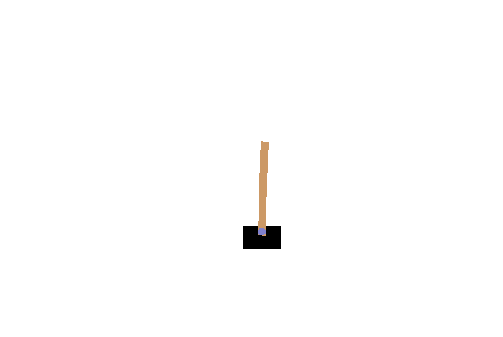

In [6]:
cartpole_env = Environment()
cartpole_env.run()
